# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Eric Grenadier</p>
### <p style="text-align: right;"> &#9989; grenadi3</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [2]:
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Ontario', 'Quebec', 'Western United States', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Peru', 'Brazil'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Argentina': ['Peru', 'Brazil']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Scandinavia', 'Great Britain'],
        'Scandinavia': ['Iceland', 'Northern Europe', 'Ukraine'],
        'Great Britain': ['Iceland', 'Northern Europe', 'Western Europe'],
        'Northern Europe': ['Scandinavia', 'Ukraine', 'Great Britain', 'Western Europe', 'Southern Europe'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'North Africa', 'Egypt', 'Middle East'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Ural']
    },
    'Africa': {
        'North Africa': ['Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo', 'Brazil'],
        'Egypt': ['North Africa', 'Southern Europe', 'Middle East', 'East Africa'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Kamchatka': ['Yakutsk', 'Japan', 'Mongolia', 'Irkutsk', 'Alaska'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Mongolia': ['Siberia', 'Irkutsk', 'Kamchatka', 'Japan', 'China'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'India', 'Middle East'],
        'China': ['Afghanistan', 'Ural', 'Siberia', 'Mongolia', 'India', 'Siam'],
        'Middle East': ['Southern Europe', 'Egypt', 'Afghanistan', 'India'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['New Guinea', 'Western Australia']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [6]:
import networkx as nx

def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information.
            The dictionary keys are continents and the values are dictionaries
            where each key is a territory and its value is a list of neighboring territories.
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board.
    """
    # Create an empty undirected graph
    G = nx.Graph()
    
    # First, add all territories as nodes with the 'continent' attribute.
    # Using add_node from NetworkX (see https://networkx.org/documentation/stable/reference/generated/networkx.Graph.add_node.html)
    for continent, territory_dict in territories.items():
        for territory in territory_dict:
            # Add the territory as a node and store the continent as an attribute
            G.add_node(territory, continent=continent)
    
    # Now, add edges between territories based on the provided neighbor connections.
    # Loop again through each continent and territory.
    for continent, territory_dict in territories.items():
        for territory, neighbors in territory_dict.items():
            # For every neighbor listed for the current territory...
            for neighbor in neighbors:
                # Check if the neighbor is already added as a node
                # (it should be if the neighbor is defined in the territories dictionary).
                if G.has_node(neighbor):
                    # Add an edge connecting the territory to its neighbor.
                    # NetworkX will ignore duplicate edges if they already exist.
                    G.add_edge(territory, neighbor)
                else:
                    # In some cases, the neighbor might not have been added (if defined outside of the territories dict).
                    # We add the neighbor as a node without a continent attribute.
                    G.add_node(neighbor)
                    G.add_edge(territory, neighbor)
                    
    return G

# Create the graph using the previously defined risk_territories dictionary.
G = create_risk_graph(risk_territories)


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

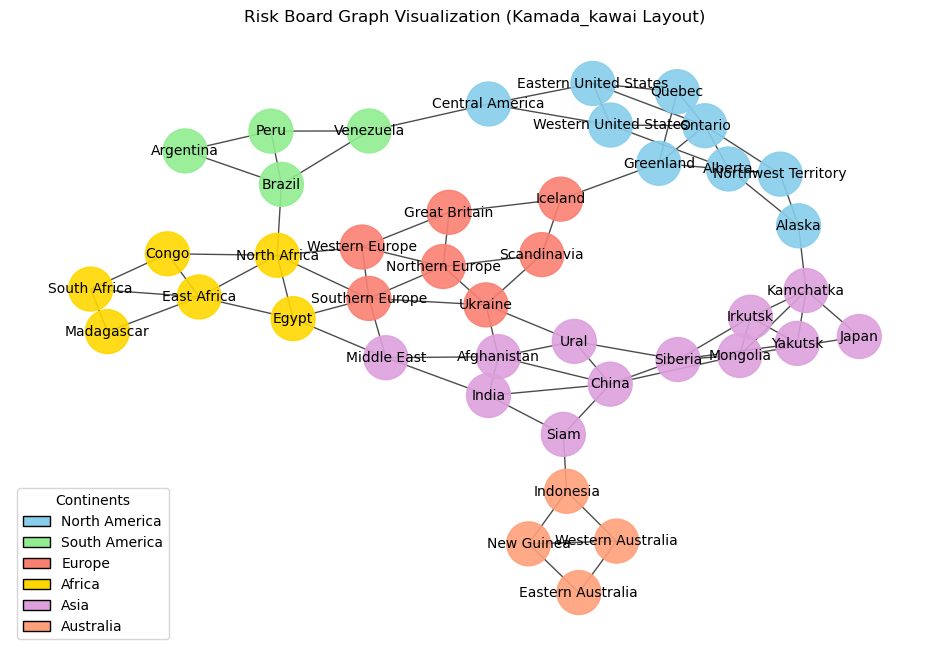

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch

def visualize_risk_graph(G, layout_choice='spring'):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board.
        layout_choice (str): The layout type to use for node positioning.
                             Options: 'spring', 'circular', 'random', 'shell', 'spectral', 'kamada_kawai'.
                             Default is 'spring'.
    """
    layouts = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout,
        'spectral': nx.spectral_layout,
        'kamada_kawai': nx.kamada_kawai_layout
    }
    
    if layout_choice not in layouts:
        print(f"Layout '{layout_choice}' not recognized. Defaulting to 'spring' layout.")
        layout_choice = 'spring'
    
    pos = layouts[layout_choice](G)
    

    continent_colors = {
        'North America': 'skyblue',
        'South America': 'lightgreen',
        'Europe': 'salmon',
        'Africa': 'gold',
        'Asia': 'plum',
        'Australia': 'lightsalmon'
    }
    

    node_colors = []
    for node, data in G.nodes(data=True):
        continent = data.get('continent', None)
        if continent and continent in continent_colors:
            node_colors.append(continent_colors[continent])
        else:
            node_colors.append('gray')
    
    node_size = 1000  
    
    font_size = 10  
    
    plt.figure(figsize=(12, 8))
    
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size, alpha=0.9)
    
    nx.draw_networkx_labels(G, pos, font_size=font_size)
    
    legend_elements = []
    for continent, color in continent_colors.items():
        legend_elements.append(Patch(facecolor=color, edgecolor='black', label=continent))
    
    plt.legend(handles=legend_elements, title="Continents", loc='best')
    
    plt.title(f"Risk Board Graph Visualization ({layout_choice.capitalize()} Layout)")
    
    plt.axis('off')
    
    plt.show()


visualize_risk_graph(G, layout_choice='kamada_kawai')


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

1. In my opinion, the **spring layout** provides the best visualization for continent-based clustering. This layout uses a force-directed algorithm that naturally groups nodes with stronger interconnections closer together, making the clusters (continents) more apparent.
```python
# Compute positions for all nodes using the spring layout.
pos = nx.spring_layout(G)
```

2. The Kamada-Kawai layout is a force-directed algorithm that positions nodes so that the geometric (Euclidean) distances between them approximate their graph-theoretical distances. This method minimizes an energy function that represents the difference between actual distances and ideal distances, producing a balanced and visually pleasing layout. I got this information from the nx docs https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_kamada_kawai.html

3. The colors are assigned in the loop that iterates over the nodes of the graph, using each node's 'continent' attribute to look up its corresponding color in the continent_colors dictionary.
```python
node_colors = []
for node, data in G.nodes(data=True):
    continent = data.get('continent', None)
    if continent and continent in continent_colors:
        node_colors.append(continent_colors[continent])
    else:
        node_colors.append('gray')
```

4. The legend is created by constructing a list of custom legend elements using matplotlib.patches.Patch for each continent, and then passing this list to plt.legend. The non-obvious part is the use of Patch to generate custom colored boxes that serve as the markers in the legend.
```python
legend_elements = []
for continent, color in continent_colors.items():
    legend_elements.append(Patch(facecolor=color, edgecolor='black', label=continent))
plt.legend(handles=legend_elements, title="Continents", loc='best')
```
5. I manually defined a dictionary named continent_colors to assign specific colors to each continent rather than importing a built-in colormap. This approach provides clear and distinct colors for each continent.
```python
continent_colors = {
    'North America': 'skyblue',
    'South America': 'lightgreen',
    'Europe': 'salmon',
    'Africa': 'gold',
    'Asia': 'plum',
    'Australia': 'lightsalmon'
}
```
6. The node size and font size were set by defining the node_size and font_size variables before drawing the graph. These values are then passed to the drawing functions to adjust the appearance of nodes and labels.
```python
node_size = 1000  # Increased node size for better visibility.
font_size = 10    # Increased font size for clearer labels.
```
7. Node labels are printed using the nx.draw_networkx_labels function, which takes the graph, the node positions, and the font size as arguments to display the names of the territories on the corresponding nodes.
```python
nx.draw_networkx_labels(G, pos, font_size=font_size)
```

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University